<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#google_stt-:-transcribe_gcs(gcs_uri)" data-toc-modified-id="google_stt-:-transcribe_gcs(gcs_uri)-1">google_stt : transcribe_gcs(gcs_uri)</a></span></li><li><span><a href="#google_stt-:-transcribe_streaming(stream_file)" data-toc-modified-id="google_stt-:-transcribe_streaming(stream_file)-2">google_stt : transcribe_streaming(stream_file)</a></span></li><li><span><a href="#info_retrieval-:-tf-idf" data-toc-modified-id="info_retrieval-:-tf-idf-3">info_retrieval : tf-idf</a></span></li><li><span><a href="#Query" data-toc-modified-id="Query-4">Query</a></span></li><li><span><a href="#Wordcloud" data-toc-modified-id="Wordcloud-5">Wordcloud</a></span></li><li><span><a href="#K-Means-:-Clustering" data-toc-modified-id="K-Means-:-Clustering-6">K-Means : Clustering</a></span></li><li><span><a href="#LDA-:-topic-modeling" data-toc-modified-id="LDA-:-topic-modeling-7">LDA : topic modeling</a></span></li><li><span><a href="#Sentiment-Analysis" data-toc-modified-id="Sentiment-Analysis-8">Sentiment Analysis</a></span></li></ul></div>

In [1]:
import csv
import pyaudio
import wave

from nltk.tokenize import sent_tokenize, word_tokenize
from modules.google_stt import transcribe_gcs, transcribe_streaming, write_wave_frames

### google_stt : transcribe_gcs(gcs_uri)

In [13]:
FILE_NAME = "bong_interview_YTN_16000"
gcs_uri = "gs://voice_magic_audio/" + FILE_NAME + ".wav"
words_with_tags, transcripts = transcribe_gcs(gcs_uri)

Waiting for operation to complete...
Transcript: 출장을 또 고생했지만 아직 팀장과의 면담은 남아있는 상태지만 이번에 깜찍 성에 대해서 좀 소개를 해 주죠네. 한국영화가 100주년을 기념하는 해인데요. 올해가 겹경사를 맞았어요. 우리나라 영화 중에 유일하게 칸 영화제 경쟁부문에 진출한 영화 기생충이 최고상인 황금종려상을 받은 건데요. 그 역사적인 현장에 있었기 때문에 현장 분위기와 함께 보고들은 것 좀 낱낱이 설명해 드리려고 합니다. 시상식대상 성을 해 달라는 요청을 받았기 때문에 약간 기대하는 분위기가 있었을 것 같은데 어땠어요? 시상식에 참석해 달라는 말이 곧 다시 꺼내 들었다라는 말과 똑같거든요. 칸영화제에서는 이게 우리나라의 같은 경우는 시상식에 참석한다고 해서 모든 이들에게 상을주지 많잖아요네 칸 영화제는 시험 시계 좀 참석해 달라 이렇게 얘기를 하면 나도 하나 받겠구나.

Transcript: 기대를 해도 되는 그런 또 독특한 점은 관례가 있어요. 송강호 씨한테 제가 직접 들어보니까 정오부터 1시 사이에 연락이 온다고 하는데 12시 41분 쯤에 연락이 없다고 해요. 40분 동안이 본인에게 굉장히 피말리는 순간이었다. 이렇게 얘기해도 했었고요. 그렇기 때문에 일단 그렇게 알고 나서는 어떤 이제 상을 받을 것인가? 그거에 대해서 좀 많이 이제 기자들도 그렇고 많이 집중을 하게 되었던 거 같아요. 황금종려상으로 사실을 뽑힐 거라고 예상을 했었나요? 지난 21일 리미 에르 극장에서 처음으로 배를 벗었는데 당시부터 좀 심상치 않게는 사실 했습니다. 상영 중에 이례적으로 개빡 3번 가는 박수갈채가 나왔었는데요. 그 어떤 장면에서 그렇게 영화 상영 중에 박스가방 왔죠. 전반적으로 보면 영화 1부와 2부로 나누어 좀게 중요한 거지. 분기점이 되는 장면이 있어요. 근데 좀 되게 돋보이는 그런 장면인데 그 장면을 끝나고 나자마자. 정말 궁금한데 직소를 박수가 터져 나오고.

Transcript: 네가 멍청한 것도 아닌데 상영 후에

In [14]:
corpus = ""
for transcript in transcripts:
        corpus += transcript + " "
# print(corpus)

In [15]:
sentence = sent_tokenize(corpus)    # 문장단위 분리
sentence

['출장을 또 고생했지만 아직 팀장과의 면담은 남아있는 상태지만 이번에 깜찍 성에 대해서 좀 소개를 해 주죠네.',
 '한국영화가 100주년을 기념하는 해인데요.',
 '올해가 겹경사를 맞았어요.',
 '우리나라 영화 중에 유일하게 칸 영화제 경쟁부문에 진출한 영화 기생충이 최고상인 황금종려상을 받은 건데요.',
 '그 역사적인 현장에 있었기 때문에 현장 분위기와 함께 보고들은 것 좀 낱낱이 설명해 드리려고 합니다.',
 '시상식대상 성을 해 달라는 요청을 받았기 때문에 약간 기대하는 분위기가 있었을 것 같은데 어땠어요?',
 '시상식에 참석해 달라는 말이 곧 다시 꺼내 들었다라는 말과 똑같거든요.',
 '칸영화제에서는 이게 우리나라의 같은 경우는 시상식에 참석한다고 해서 모든 이들에게 상을주지 많잖아요네 칸 영화제는 시험 시계 좀 참석해 달라 이렇게 얘기를 하면 나도 하나 받겠구나.',
 '기대를 해도 되는 그런 또 독특한 점은 관례가 있어요.',
 '송강호 씨한테 제가 직접 들어보니까 정오부터 1시 사이에 연락이 온다고 하는데 12시 41분 쯤에 연락이 없다고 해요.',
 '40분 동안이 본인에게 굉장히 피말리는 순간이었다.',
 '이렇게 얘기해도 했었고요.',
 '그렇기 때문에 일단 그렇게 알고 나서는 어떤 이제 상을 받을 것인가?',
 '그거에 대해서 좀 많이 이제 기자들도 그렇고 많이 집중을 하게 되었던 거 같아요.',
 '황금종려상으로 사실을 뽑힐 거라고 예상을 했었나요?',
 '지난 21일 리미 에르 극장에서 처음으로 배를 벗었는데 당시부터 좀 심상치 않게는 사실 했습니다.',
 '상영 중에 이례적으로 개빡 3번 가는 박수갈채가 나왔었는데요.',
 '그 어떤 장면에서 그렇게 영화 상영 중에 박스가방 왔죠.',
 '전반적으로 보면 영화 1부와 2부로 나누어 좀게 중요한 거지.',
 '분기점이 되는 장면이 있어요.',
 '근데 좀 되게 돋보이는 그런 장면인데 그 장면을 끝나고 나자마자.',
 '정말 궁금한데 직소를 박수가 터져 나오고.',
 '네가 멍

In [16]:
# 스크립트 만 Text 파일로 저장 (with newline)
text_file = "text/" + FILE_NAME + ".txt"
with open(text_file, 'w', encoding='utf-8') as f:
    for sent in sentence:
        f.write(sent + "\n")

In [17]:
words_array = [wt for wt in words_with_tags]
words_array

[['출장을', 0.0, 1.2, 0],
 ['또', 1.2, 1.5, 0],
 ['고생했지만', 1.5, 2.3, 0],
 ['아직', 2.3, 3.8, 0],
 ['팀장과의', 3.8, 4.4, 0],
 ['면담은', 4.4, 4.4, 0],
 ['남아있는', 4.4, 5.3, 0],
 ['상태지만', 5.3, 5.8, 0],
 ['이번에', 5.8, 10.2, 0],
 ['깜찍', 10.2, 10.7, 0],
 ['성에', 10.7, 10.9, 0],
 ['대해서', 10.9, 11.1, 0],
 ['좀', 11.1, 11.4, 0],
 ['소개를', 11.4, 12.5, 0],
 ['해', 12.5, 12.9, 0],
 ['주죠', 12.9, 13.1, 0],
 ['네', 13.1, 14.0, 0],
 ['한국영화가', 14.0, 15.8, 0],
 ['100주년을', 15.8, 17.4, 0],
 ['기념하는', 17.4, 17.8, 0],
 ['해인데요', 17.8, 18.6, 0],
 ['올해가', 18.6, 19.0, 0],
 ['겹경사를', 19.0, 20.2, 0],
 ['맞았어요', 20.2, 20.7, 0],
 ['우리나라', 20.7, 21.7, 0],
 ['영화', 21.7, 22.4, 0],
 ['중에', 22.4, 22.7, 0],
 ['유일하게', 22.7, 23.1, 0],
 ['칸', 23.1, 24.1, 0],
 ['영화제', 24.1, 24.4, 0],
 ['경쟁부문에', 24.4, 25.3, 0],
 ['진출한', 25.3, 25.9, 0],
 ['영화', 25.9, 26.4, 0],
 ['기생충이', 26.4, 27.1, 0],
 ['최고상인', 27.1, 27.9, 0],
 ['황금종려상을', 27.9, 29.0, 0],
 ['받은', 29.0, 29.4, 0],
 ['건데요', 29.4, 29.7, 0],
 ['그', 29.7, 30.3, 0],
 ['역사적인', 30.3, 31.0, 0],
 ['현장에', 31.0

In [18]:
# CSV 파일로 저장
csv_file = "text/" + FILE_NAME + ".csv"
with open(csv_file, 'w', encoding='utf-8', newline='') as f:
    wr = csv.writer(f)
    wr.writerow(["word", "start_time", "end_time", "speaker_tag"])
    for words in words_array:
        wr.writerow(words)

### google_stt : transcribe_streaming(stream_file)

In [2]:
# instantiate PyAudio
audio = pyaudio.PyAudio()

In [3]:
# open wave file
FILE_NAME = "bong_interview_YTN_16000"
wf = wave.open("audio_file/"+ FILE_NAME + ".wav", 'rb')

In [4]:
# initialize variables
CHUNK = 1024   # 1024 bytes of data read from the buffer
FRAME_SIZE = CHUNK * 4
WAVE_OUTPUT_FILENAME = "wave_output.wav"    # temperary wave file for streaming 
FORMAT=audio.get_sample_size(wf.getsampwidth())
CHANNELS=wf.getnchannels()
RATE=wf.getframerate()
words_with_tags = []
transcripts_arr = []
frames = []
f_count = 0

In [5]:
# read data (first frames)
data = wf.readframes(CHUNK)

# transcribe stream  : wave file을 10M 이하로 잘라서, google STT API에 stream 방식으로 요청
while len(data) > 0:
    frames.append(data)
    f_count += 1
    if f_count == FRAME_SIZE:
        # write frames to wave file for frames
        write_wave_frames(frames, WAVE_OUTPUT_FILENAME, CHANNELS, FORMAT, RATE)
        
        # transcribe by streaming
        words_with_tag, transcripts = transcribe_streaming(WAVE_OUTPUT_FILENAME)    # frames를 직접 전달 시 google에서 grpc.RpcError 발생하면 cancel 됨 
        words_with_tags.append(words_with_tag)
        transcripts_arr.append(transcripts)
        
        # frame initialize
        frames = []
        f_count = 0
    
    # read data (continue)
    data = wf.readframes(CHUNK)

# transcribe for last frames
write_wave_frames(frames, WAVE_OUTPUT_FILENAME, CHANNELS, FORMAT, RATE)

# last frames
words_with_tag, transcripts = transcribe_streaming(WAVE_OUTPUT_FILENAME)
words_with_tags.append(words_with_tag)
transcripts_arr.append(transcripts)

Waiting for transcribe...
Transcript: 출장을 또 고생했지만 아직 팀장과의 면담은 남아있는 상태이지만 이번에 소개를 해 주죠. 한국영화가 100주년을 기념하는 해인데요. 올해가 경사를 맞았어요. 우리나라 영화 중에 유일하게 칸 영화제 경쟁부문에 진출한 영화 기생충이 최고상인 황금종려상을 받은 건데요. 그 역사적인 현장에 있었기 때문에 현장 분위기와 함께 보고들은 걸 좀 낱낱이 설명해 드리려고 합니다. 시상식대상 서울 해 달라는 요청을 받았기 때문에 약간 기대하는 분위기가 있었을 것 같은데 어땠어요? 시상식에 참석해 달라는 말이 곧 다시 꺼내 들었다라는 말과 똑같거든요. 칸영화제에서는 이게 우리나라의 같은 경우는 시상식에 참석한다고 해서 모든 이들에게 상을 지진 않잖아요네 칸 영화제는 시험 시계 좀 참석해 달라 이렇게 얘기를 하면 뭐 하나 받겠구나.

Transcript: 기도를 해도 되는 그런 또 독특한 점은 관례가 있어요. 송강호 씨한테 제가 직접 들어보니까 경우부터 1시 사이에 연락이 온다고 하는데 12시 41분 쯤에 연락이 없다고 해요. 40분 동안이 보내는게 굉장히 피말리는 순간이었다. 이렇게 얘기해도 했었고요. 그렇기 때문에 일단 그렇게 알고 나서는 어떤 이제 상을 받을 것인가? 그거에 대해서 좀 많이 이제 기자들도 그렇고 많이 집중을 하게 되었던 것 같아요. 황금종려상으로 사실을 뽑힐 거라고 예상을 했었나요? 지난 21일 극장에서 처음으로 배를 벗었는데 당시부터 좀 심상치 않기는 사살했습니다. 창녕 중에 이례적으로 개빡 3번 가는 박수갈채가 나왔었는데요. 그 어떤 장면에서 그렇게 영화 상영 중에 박수가 나왔죠. 전반적으론 영화 1부와 2부로 나누어 좀게 중요한 거지. 분기점이 되는 장면이 있어요. 근데 좀 슬랩스틱 돋보기는 그런 장면인데 그 장면을 끝나고 나자마자. 정말 궁금한데 직소를 박수가 터져 나온

Transcript: 내가 정하는 것도 아닌데 상경 후에도 약 8분간 기립박수가 있었고 이후에 이제 한지 매체들에 반

In [6]:
# close PyAudio
audio.terminate()

In [7]:
corpus = ""
for transcripts in transcripts_arr:
    for transcript in transcripts:
        corpus += transcript + " "

sentence = sent_tokenize(corpus)    # 문장단위 분리
sentence

['출장을 또 고생했지만 아직 팀장과의 면담은 남아있는 상태이지만 이번에 소개를 해 주죠.',
 '한국영화가 100주년을 기념하는 해인데요.',
 '올해가 경사를 맞았어요.',
 '우리나라 영화 중에 유일하게 칸 영화제 경쟁부문에 진출한 영화 기생충이 최고상인 황금종려상을 받은 건데요.',
 '그 역사적인 현장에 있었기 때문에 현장 분위기와 함께 보고들은 걸 좀 낱낱이 설명해 드리려고 합니다.',
 '시상식대상 서울 해 달라는 요청을 받았기 때문에 약간 기대하는 분위기가 있었을 것 같은데 어땠어요?',
 '시상식에 참석해 달라는 말이 곧 다시 꺼내 들었다라는 말과 똑같거든요.',
 '칸영화제에서는 이게 우리나라의 같은 경우는 시상식에 참석한다고 해서 모든 이들에게 상을 지진 않잖아요네 칸 영화제는 시험 시계 좀 참석해 달라 이렇게 얘기를 하면 뭐 하나 받겠구나.',
 '기도를 해도 되는 그런 또 독특한 점은 관례가 있어요.',
 '송강호 씨한테 제가 직접 들어보니까 경우부터 1시 사이에 연락이 온다고 하는데 12시 41분 쯤에 연락이 없다고 해요.',
 '40분 동안이 보내는게 굉장히 피말리는 순간이었다.',
 '이렇게 얘기해도 했었고요.',
 '그렇기 때문에 일단 그렇게 알고 나서는 어떤 이제 상을 받을 것인가?',
 '그거에 대해서 좀 많이 이제 기자들도 그렇고 많이 집중을 하게 되었던 것 같아요.',
 '황금종려상으로 사실을 뽑힐 거라고 예상을 했었나요?',
 '지난 21일 극장에서 처음으로 배를 벗었는데 당시부터 좀 심상치 않기는 사살했습니다.',
 '창녕 중에 이례적으로 개빡 3번 가는 박수갈채가 나왔었는데요.',
 '그 어떤 장면에서 그렇게 영화 상영 중에 박수가 나왔죠.',
 '전반적으론 영화 1부와 2부로 나누어 좀게 중요한 거지.',
 '분기점이 되는 장면이 있어요.',
 '근데 좀 슬랩스틱 돋보기는 그런 장면인데 그 장면을 끝나고 나자마자.',
 '정말 궁금한데 직소를 박수가 터져 나온 내가 정하는 것도 아닌데 상경 후에도 약 8분간 기립박수

In [8]:
# 스크립트 만 Text 파일로 저장 (with newline)
text_file = "text/" + FILE_NAME + ".txt"
with open(text_file, 'w', encoding='utf-8') as f:
    for sent in sentence:
        f.write(sent + "\n")

In [9]:
words_array = [wt for wts in words_with_tags for wt in wts]
words_array

[['출장을', 0.0, 1.2, 1],
 ['또', 1.2, 1.5, 1],
 ['고생했지만', 1.5, 2.3, 1],
 ['아직', 2.3, 3.8, 1],
 ['팀장과의', 3.8, 4.4, 1],
 ['면담은', 4.4, 4.4, 1],
 ['남아있는', 4.4, 5.3, 1],
 ['상태이지만', 5.3, 5.8, 1],
 ['이번에', 5.8, 10.2, 1],
 ['소개를', 10.2, 12.5, 1],
 ['해', 12.5, 12.9, 1],
 ['주죠', 12.9, 13.1, 1],
 ['한국영화가', 13.1, 15.8, 1],
 ['100주년을', 15.8, 17.3, 1],
 ['기념하는', 17.3, 17.8, 1],
 ['해인데요', 17.8, 18.6, 1],
 ['올해가', 18.6, 19.0, 1],
 ['경사를', 19.0, 20.2, 1],
 ['맞았어요', 20.2, 20.7, 1],
 ['우리나라', 20.7, 21.7, 1],
 ['영화', 21.7, 22.4, 1],
 ['중에', 22.4, 22.7, 1],
 ['유일하게', 22.7, 23.1, 1],
 ['칸', 23.1, 24.1, 1],
 ['영화제', 24.1, 24.4, 1],
 ['경쟁부문에', 24.4, 25.3, 1],
 ['진출한', 25.3, 25.9, 1],
 ['영화', 25.9, 26.4, 1],
 ['기생충이', 26.4, 27.1, 1],
 ['최고상인', 27.1, 27.9, 1],
 ['황금종려상을', 27.9, 29.0, 1],
 ['받은', 29.0, 29.4, 1],
 ['건데요', 29.4, 29.7, 1],
 ['그', 29.7, 30.3, 1],
 ['역사적인', 30.3, 31.0, 1],
 ['현장에', 31.0, 31.4, 1],
 ['있었기', 31.4, 31.8, 1],
 ['때문에', 31.8, 32.3, 1],
 ['현장', 32.3, 32.7, 1],
 ['분위기와', 32.7, 33.3, 1],
 ['함께',

In [10]:
# CSV 파일로 저장
csv_file = "text/" + FILE_NAME + ".csv"
with open(csv_file, 'w', encoding='utf-8', newline='') as f:
    wr = csv.writer(f)
    wr.writerow(["word", "start_time", "end_time", "speaker_tag"])
    for words in words_array:
        wr.writerow(words)

### info_retrieval : tf-idf

In [11]:
from modules import info_retrieval as ir
from modules.info_retrieval import clean_collection
from modules.info_retrieval import get_extended_lexicon
from modules.info_retrieval import inverted_index_with_tf
from modules.info_retrieval import get_tdm_from_dtm
from modules.info_retrieval import tdm2twm
from modules.info_retrieval import evaluate_idf

In [12]:
import numpy as np
import pandas as pd

In [13]:
collection = []
for idx, sent in enumerate(sentence):
    collection.append(["paragraph"+str(idx), sent])

In [14]:
collection

[['paragraph0', '출장을 또 고생했지만 아직 팀장과의 면담은 남아있는 상태이지만 이번에 소개를 해 주죠.'],
 ['paragraph1', '한국영화가 100주년을 기념하는 해인데요.'],
 ['paragraph2', '올해가 경사를 맞았어요.'],
 ['paragraph3', '우리나라 영화 중에 유일하게 칸 영화제 경쟁부문에 진출한 영화 기생충이 최고상인 황금종려상을 받은 건데요.'],
 ['paragraph4', '그 역사적인 현장에 있었기 때문에 현장 분위기와 함께 보고들은 걸 좀 낱낱이 설명해 드리려고 합니다.'],
 ['paragraph5', '시상식대상 서울 해 달라는 요청을 받았기 때문에 약간 기대하는 분위기가 있었을 것 같은데 어땠어요?'],
 ['paragraph6', '시상식에 참석해 달라는 말이 곧 다시 꺼내 들었다라는 말과 똑같거든요.'],
 ['paragraph7',
  '칸영화제에서는 이게 우리나라의 같은 경우는 시상식에 참석한다고 해서 모든 이들에게 상을 지진 않잖아요네 칸 영화제는 시험 시계 좀 참석해 달라 이렇게 얘기를 하면 뭐 하나 받겠구나.'],
 ['paragraph8', '기도를 해도 되는 그런 또 독특한 점은 관례가 있어요.'],
 ['paragraph9',
  '송강호 씨한테 제가 직접 들어보니까 경우부터 1시 사이에 연락이 온다고 하는데 12시 41분 쯤에 연락이 없다고 해요.'],
 ['paragraph10', '40분 동안이 보내는게 굉장히 피말리는 순간이었다.'],
 ['paragraph11', '이렇게 얘기해도 했었고요.'],
 ['paragraph12', '그렇기 때문에 일단 그렇게 알고 나서는 어떤 이제 상을 받을 것인가?'],
 ['paragraph13', '그거에 대해서 좀 많이 이제 기자들도 그렇고 많이 집중을 하게 되었던 것 같아요.'],
 ['paragraph14', '황금종려상으로 사실을 뽑힐 거라고 예상을 했었나요?'],
 ['paragraph15', '지난 21일 극장에서 처음으

In [15]:
cleaned_collection = clean_collection(collection)
cleaned_collection

[['paragraph0', '출장을 또 고생했지만 아직 팀장과의 면담은 남아있는 상태이지만 이번에 소개를 해 주죠 '],
 ['paragraph1', '한국영화가 100주년을 기념하는 해인데요 '],
 ['paragraph2', '올해가 경사를 맞았어요 '],
 ['paragraph3', '우리나라 영화 중에 유일하게 칸 영화제 경쟁부문에 진출한 영화 기생충이 최고상인 황금종려상을 받은 건데요 '],
 ['paragraph4', '그 역사적인 현장에 있었기 때문에 현장 분위기와 함께 보고들은 걸 좀 낱낱이 설명해 드리려고 합니다 '],
 ['paragraph5', '시상식대상 서울 해 달라는 요청을 받았기 때문에 약간 기대하는 분위기가 있었을 것 같은데 어땠어요 '],
 ['paragraph6', '시상식에 참석해 달라는 말이 곧 다시 꺼내 들었다라는 말과 똑같거든요 '],
 ['paragraph7',
  '칸영화제에서는 이게 우리나라의 같은 경우는 시상식에 참석한다고 해서 모든 이들에게 상을 지진 않잖아요네 칸 영화제는 시험 시계 좀 참석해 달라 이렇게 얘기를 하면 뭐 하나 받겠구나 '],
 ['paragraph8', '기도를 해도 되는 그런 또 독특한 점은 관례가 있어요 '],
 ['paragraph9',
  '송강호 씨한테 제가 직접 들어보니까 경우부터 1시 사이에 연락이 온다고 하는데 12시 41분 쯤에 연락이 없다고 해요 '],
 ['paragraph10', '40분 동안이 보내는게 굉장히 피말리는 순간이었다 '],
 ['paragraph11', '이렇게 얘기해도 했었고요 '],
 ['paragraph12', '그렇기 때문에 일단 그렇게 알고 나서는 어떤 이제 상을 받을 것인가 '],
 ['paragraph13', '그거에 대해서 좀 많이 이제 기자들도 그렇고 많이 집중을 하게 되었던 것 같아요 '],
 ['paragraph14', '황금종려상으로 사실을 뽑힐 거라고 예상을 했었나요 '],
 ['paragraph15', '지난 21일 극장에서 처음으

In [19]:
extended_collection = []

for idx, (paragraph, corpus) in enumerate(cleaned_collection):
    extended_lexicon = get_extended_lexicon(corpus, nouns=False, stopwords=True)
    if len(extended_lexicon) > 0:
        extended_collection.append([paragraph, list(extended_lexicon)])

In [20]:
extended_collection

[['paragraph0',
  ['출장을',
   '고생했지만',
   '아직',
   '팀장과의',
   '면담은',
   '남아있는',
   '상태이지만',
   '이번에',
   '소개를',
   '주죠',
   '출장',
   '고생',
   '지만',
   '아직',
   '팀장',
   '면담',
   '상태',
   '지만',
   '이번',
   '소개',
   '출장',
   '장을',
   '고생',
   '생했',
   '했지',
   '지만',
   '아직',
   '팀장',
   '장과',
   '과의',
   '면담',
   '담은',
   '남아',
   '아있',
   '있는',
   '상태',
   '태이',
   '이지',
   '지만',
   '이번',
   '번에',
   '소개',
   '개를',
   '주죠']],
 ['paragraph1',
  ['한국영화가',
   '100주년을',
   '기념하는',
   '해인데요',
   '한국',
   '영화',
   '100',
   '주년',
   '기념',
   'ㄴ데요',
   '한국',
   '국영',
   '영화',
   '화가',
   '10',
   '00',
   '0주',
   '주년',
   '년을',
   '기념',
   '념하',
   '하는',
   '해인',
   '인데',
   '데요']],
 ['paragraph2',
  ['올해가',
   '경사를',
   '맞았어요',
   '올해',
   '경사',
   '어요',
   '올해',
   '해가',
   '경사',
   '사를',
   '맞았',
   '았어',
   '어요']],
 ['paragraph3',
  ['우리나라',
   '영화',
   '중에',
   '유일하게',
   '영화제',
   '경쟁부문에',
   '진출한',
   '영화',
   '기생충이',
   '최고상인',
   '황금종려상을',
   '받은',
   '건데요',
   '우리나라',
   '영화',
   '유일

In [21]:
global_lexicon, global_posting, global_paragraph, dtm_dict = inverted_index_with_tf(extended_collection)

indexing 완료


In [22]:
print(global_lexicon)

{'출장을': 1054, '고생했지만': 1, '아직': 2, '팀장과의': 3, '면담은': 4, '남아있는': 5, '상태이지만': 6, '이번에': 1056, '소개를': 8, '주죠': 9, '출장': 1063, '고생': 11, '지만': 12, '팀장': 13, '면담': 14, '상태': 15, '이번': 1065, '소개': 17, '장을': 1070, '생했': 19, '했지': 20, '장과': 21, '과의': 22, '담은': 23, '남아': 24, '아있': 25, '있는': 26, '태이': 27, '이지': 28, '번에': 1072, '개를': 30, '한국영화가': 31, '100주년을': 32, '기념하는': 33, '해인데요': 34, '한국': 35, '영화': 517, '100': 37, '주년': 38, '기념': 39, 'ㄴ데요': 83, '국영': 41, '화가': 42, '10': 43, '00': 44, '0주': 45, '년을': 46, '념하': 47, '하는': 706, '해인': 49, '인데': 570, '데요': 497, '올해가': 52, '경사를': 53, '맞았어요': 54, '올해': 55, '경사': 56, '어요': 1026, '해가': 58, '사를': 59, '맞았': 60, '았어': 61, '우리나라': 233, '중에': 503, '유일하게': 65, '영화제': 230, '경쟁부문에': 67, '진출한': 68, '기생충이': 69, '최고상인': 70, '황금종려상을': 71, '받은': 72, '건데요': 73, '유일': 74, '경쟁': 75, '부문': 76, '진출': 77, '기생충': 818, '최고': 79, '상인': 80, '황금': 870, '종려': 871, '우리': 250, '리나': 251, '나라': 252, '일하': 87, '하게': 395, '화제': 247, '쟁부': 90, '문에': 644, '출한': 92, '기생': 831, '생충': 

In [25]:
print(global_posting)

[[0, 0, 0.25, -1], [1, 0, 0.25, -1], [2, 0, 0.75, -1], [3, 0, 0.25, -1], [4, 0, 0.25, -1], [5, 0, 0.25, -1], [6, 0, 0.25, -1], [7, 0, 0.25, -1], [8, 0, 0.25, -1], [9, 0, 0.5, -1], [10, 0, 0.5, -1], [11, 0, 0.5, -1], [12, 0, 1.0, -1], [13, 0, 0.5, -1], [14, 0, 0.5, -1], [15, 0, 0.5, -1], [16, 0, 0.5, -1], [17, 0, 0.5, -1], [18, 0, 0.25, -1], [19, 0, 0.25, -1], [20, 0, 0.25, -1], [21, 0, 0.25, -1], [22, 0, 0.25, -1], [23, 0, 0.25, -1], [24, 0, 0.25, -1], [25, 0, 0.25, -1], [26, 0, 0.25, -1], [27, 0, 0.25, -1], [28, 0, 0.25, -1], [29, 0, 0.25, -1], [30, 0, 0.25, -1], [31, 1, 0.5, -1], [32, 1, 0.5, -1], [33, 1, 0.5, -1], [34, 1, 0.5, -1], [35, 1, 1.0, -1], [36, 1, 1.0, -1], [37, 1, 0.5, -1], [38, 1, 1.0, -1], [39, 1, 1.0, -1], [40, 1, 0.5, -1], [41, 1, 0.5, -1], [42, 1, 0.5, -1], [43, 1, 0.5, -1], [44, 1, 0.5, -1], [45, 1, 0.5, -1], [46, 1, 0.5, -1], [47, 1, 0.5, -1], [48, 1, 0.5, -1], [49, 1, 0.5, -1], [50, 1, 0.5, -1], [51, 1, 0.5, -1], [52, 2, 0.5, -1], [53, 2, 0.5, -1], [54, 2, 0.5, -1

In [26]:
print(global_paragraph)

['paragraph0', 'paragraph1', 'paragraph2', 'paragraph3', 'paragraph4', 'paragraph5', 'paragraph6', 'paragraph7', 'paragraph8', 'paragraph9', 'paragraph10', 'paragraph11', 'paragraph12', 'paragraph13', 'paragraph14', 'paragraph15', 'paragraph16', 'paragraph17', 'paragraph18', 'paragraph19', 'paragraph20', 'paragraph21', 'paragraph22', 'paragraph23', 'paragraph24', 'paragraph25', 'paragraph26', 'paragraph27', 'paragraph28', 'paragraph29', 'paragraph30', 'paragraph31', 'paragraph32', 'paragraph33', 'paragraph34', 'paragraph35', 'paragraph36', 'paragraph37']


In [27]:
print(dtm_dict)

{'paragraph0': defaultdict(<class 'int'>, {'출장을': 1, '고생했지만': 1, '아직': 3, '팀장과의': 1, '면담은': 1, '남아있는': 1, '상태이지만': 1, '이번에': 1, '소개를': 1, '주죠': 2, '출장': 2, '고생': 2, '지만': 4, '팀장': 2, '면담': 2, '상태': 2, '이번': 2, '소개': 2, '장을': 1, '생했': 1, '했지': 1, '장과': 1, '과의': 1, '담은': 1, '남아': 1, '아있': 1, '있는': 1, '태이': 1, '이지': 1, '번에': 1, '개를': 1}), 'paragraph1': defaultdict(<class 'int'>, {'한국영화가': 1, '100주년을': 1, '기념하는': 1, '해인데요': 1, '한국': 2, '영화': 2, '100': 1, '주년': 2, '기념': 2, 'ㄴ데요': 1, '국영': 1, '화가': 1, '10': 1, '00': 1, '0주': 1, '년을': 1, '념하': 1, '하는': 1, '해인': 1, '인데': 1, '데요': 1}), 'paragraph2': defaultdict(<class 'int'>, {'올해가': 1, '경사를': 1, '맞았어요': 1, '올해': 2, '경사': 2, '어요': 2, '해가': 1, '사를': 1, '맞았': 1, '았어': 1}), 'paragraph3': defaultdict(<class 'int'>, {'우리나라': 2, '영화': 7, '중에': 2, '유일하게': 1, '영화제': 2, '경쟁부문에': 1, '진출한': 1, '기생충이': 1, '최고상인': 1, '황금종려상을': 1, '받은': 2, '건데요': 1, '유일': 2, '경쟁': 2, '부문': 2, '진출': 2, '기생충': 1, '최고': 2, '상인': 2, '황금': 2, '종려': 2, 'ㄴ데요': 1, '우리': 1, '리나': 1, 

In [28]:
for index_term, posting_idx in global_lexicon.items():
    # index_term:단어, posting_idx:위치
    print(index_term)
    
    while True:    # Posting Nexting: -1
        if posting_idx == -1:
            break
            
        posting_data = global_posting[posting_idx]
        print("    {0}    /    TF:{1}    /    Next:{2}".format(global_paragraph[posting_data[1]], posting_data[2], posting_data[3]))
        posting_idx = posting_data[3]

출장을
    paragraph37    /    TF:0.3333333333333333    /    Next:0
    paragraph0    /    TF:0.25    /    Next:-1
고생했지만
    paragraph0    /    TF:0.25    /    Next:-1
아직
    paragraph0    /    TF:0.75    /    Next:-1
팀장과의
    paragraph0    /    TF:0.25    /    Next:-1
면담은
    paragraph0    /    TF:0.25    /    Next:-1
남아있는
    paragraph0    /    TF:0.25    /    Next:-1
상태이지만
    paragraph0    /    TF:0.25    /    Next:-1
이번에
    paragraph37    /    TF:0.3333333333333333    /    Next:7
    paragraph0    /    TF:0.25    /    Next:-1
소개를
    paragraph0    /    TF:0.25    /    Next:-1
주죠
    paragraph0    /    TF:0.5    /    Next:-1
출장
    paragraph37    /    TF:0.6666666666666666    /    Next:10
    paragraph0    /    TF:0.5    /    Next:-1
고생
    paragraph0    /    TF:0.5    /    Next:-1
지만
    paragraph0    /    TF:1.0    /    Next:-1
팀장
    paragraph0    /    TF:0.5    /    Next:-1
면담
    paragraph0    /    TF:0.5    /    Next:-1
상태
    paragraph0    /    TF:0.5    /    Next:-1
이번
    pa

In [29]:
tdm = get_tdm_from_dtm(dtm_dict)
tdm

{'출장을': defaultdict(int, {'paragraph0': 1, 'paragraph37': 1}),
 '고생했지만': defaultdict(int, {'paragraph0': 1}),
 '아직': defaultdict(int, {'paragraph0': 3}),
 '팀장과의': defaultdict(int, {'paragraph0': 1}),
 '면담은': defaultdict(int, {'paragraph0': 1}),
 '남아있는': defaultdict(int, {'paragraph0': 1}),
 '상태이지만': defaultdict(int, {'paragraph0': 1}),
 '이번에': defaultdict(int, {'paragraph0': 1, 'paragraph37': 1}),
 '소개를': defaultdict(int, {'paragraph0': 1}),
 '주죠': defaultdict(int, {'paragraph0': 2}),
 '출장': defaultdict(int, {'paragraph0': 2, 'paragraph37': 2}),
 '고생': defaultdict(int, {'paragraph0': 2}),
 '지만': defaultdict(int, {'paragraph0': 4}),
 '팀장': defaultdict(int, {'paragraph0': 2}),
 '면담': defaultdict(int, {'paragraph0': 2}),
 '상태': defaultdict(int, {'paragraph0': 2}),
 '이번': defaultdict(int, {'paragraph0': 2, 'paragraph37': 2}),
 '소개': defaultdict(int, {'paragraph0': 2}),
 '장을': defaultdict(int, {'paragraph0': 1, 'paragraph37': 1}),
 '생했': defaultdict(int, {'paragraph0': 1}),
 '했지': defaultdi

In [30]:
twm, dvw = tdm2twm(tdm, global_paragraph)
twm

{'출장을': defaultdict(float,
             {'paragraph0': 1.290034611362518,
              'paragraph37': 1.290034611362518}),
 '고생했지만': defaultdict(float, {'paragraph0': 1.591064607026499}),
 '아직': defaultdict(float, {'paragraph0': 4.773193821079497}),
 '팀장과의': defaultdict(float, {'paragraph0': 1.591064607026499}),
 '면담은': defaultdict(float, {'paragraph0': 1.591064607026499}),
 '남아있는': defaultdict(float, {'paragraph0': 1.591064607026499}),
 '상태이지만': defaultdict(float, {'paragraph0': 1.591064607026499}),
 '이번에': defaultdict(float,
             {'paragraph0': 1.290034611362518,
              'paragraph37': 1.290034611362518}),
 '소개를': defaultdict(float, {'paragraph0': 1.591064607026499}),
 '주죠': defaultdict(float, {'paragraph0': 3.182129214052998}),
 '출장': defaultdict(float,
             {'paragraph0': 2.580069222725036,
              'paragraph37': 2.580069222725036}),
 '고생': defaultdict(float, {'paragraph0': 3.182129214052998}),
 '지만': defaultdict(float, {'paragraph0': 6.364258428105996}

In [31]:
dvw

{'paragraph0': defaultdict(float,
             {'출장을': 1.664189298513243,
              '고생했지만': 2.531486583732388,
              '아직': 22.783379253591487,
              '팀장과의': 2.531486583732388,
              '면담은': 2.531486583732388,
              '남아있는': 2.531486583732388,
              '상태이지만': 2.531486583732388,
              '이번에': 1.664189298513243,
              '소개를': 2.531486583732388,
              '주죠': 10.125946334929552,
              '출장': 6.656757194052972,
              '고생': 10.125946334929552,
              '지만': 40.503785339718206,
              '팀장': 10.125946334929552,
              '면담': 10.125946334929552,
              '상태': 10.125946334929552,
              '이번': 6.656757194052972,
              '소개': 10.125946334929552,
              '장을': 1.664189298513243,
              '생했': 2.531486583732388,
              '했지': 2.531486583732388,
              '장과': 2.531486583732388,
              '과의': 2.531486583732388,
              '담은': 2.531486583732388,
        

In [32]:
global_lexicon_idf, global_paragraph_weight = evaluate_idf(global_lexicon, global_posting, global_paragraph)

In [33]:
global_lexicon_idf

{'출장을': 1.290034611362518,
 '고생했지만': 1.591064607026499,
 '아직': 1.591064607026499,
 '팀장과의': 1.591064607026499,
 '면담은': 1.591064607026499,
 '남아있는': 1.591064607026499,
 '상태이지만': 1.591064607026499,
 '이번에': 1.290034611362518,
 '소개를': 1.591064607026499,
 '주죠': 1.591064607026499,
 '출장': 1.290034611362518,
 '고생': 1.591064607026499,
 '지만': 1.591064607026499,
 '팀장': 1.591064607026499,
 '면담': 1.591064607026499,
 '상태': 1.591064607026499,
 '이번': 1.290034611362518,
 '소개': 1.591064607026499,
 '장을': 1.290034611362518,
 '생했': 1.591064607026499,
 '했지': 1.591064607026499,
 '장과': 1.591064607026499,
 '과의': 1.591064607026499,
 '담은': 1.591064607026499,
 '남아': 1.591064607026499,
 '아있': 1.591064607026499,
 '있는': 1.591064607026499,
 '태이': 1.591064607026499,
 '이지': 1.591064607026499,
 '번에': 1.290034611362518,
 '개를': 1.591064607026499,
 '한국영화가': 1.591064607026499,
 '100주년을': 1.591064607026499,
 '기념하는': 1.591064607026499,
 '해인데요': 1.591064607026499,
 '한국': 1.591064607026499,
 '영화': 0.8920946026904804,
 '100': 1.59

In [34]:
global_paragraph_weight

{'paragraph37': 12.35333366457521,
 'paragraph0': 11.690524131781022,
 'paragraph1': 17.95889422080805,
 'paragraph18': 11.13307888369647,
 'paragraph17': 8.34949307532263,
 'paragraph7': 19.649701160940374,
 'paragraph3': 3.8815311328211295,
 'paragraph23': 19.45985764096613,
 'paragraph21': 23.385579451428725,
 'paragraph9': 16.373436392223216,
 'paragraph5': 15.856952805852469,
 'paragraph20': 6.435899790052189,
 'paragraph16': 22.0993786325006,
 'paragraph2': 9.966383766808146,
 'paragraph35': 12.989709483919945,
 'paragraph30': 25.745367431910584,
 'paragraph26': 18.65398389380851,
 'paragraph19': 7.949340602499134,
 'paragraph8': 9.134208827291227,
 'paragraph28': 12.202940153668006,
 'paragraph25': 9.613645551287615,
 'paragraph14': 20.303018933150554,
 'paragraph13': 4.036686512798892,
 'paragraph12': 7.257863729807755,
 'paragraph4': 7.995836263292766,
 'paragraph34': 6.445210010258277,
 'paragraph22': 8.709884394533233,
 'paragraph27': 5.801433719339057,
 'paragraph15': 36.79

### Query

In [88]:
# query = "영화제 황금종려상"
query = "영화 박수 장면"

query_repr = ir.query_index(query)
query_weight = ir.eval_query_weight(query_repr, global_lexicon_idf)
candidate_list = ir.candidate_list_by_cosine(query_weight, global_lexicon, global_posting, global_paragraph, global_paragraph_weight)
result_list = ir.cosine_sort(candidate_list)
ir.result_print(query, result_list, global_paragraph, collection, count=5)

query:  영화 박수 장면
순위:1 / 문서:paragraph17 / 유사도:0.25071860435517346
   document:['paragraph17', '그 어떤 장면에서 그렇게 영화 상영 중에 박수가 나왔죠.']
순위:2 / 문서:paragraph3 / 유사도:0.2298305931767958
   document:['paragraph3', '우리나라 영화 중에 유일하게 칸 영화제 경쟁부문에 진출한 영화 기생충이 최고상인 황금종려상을 받은 건데요.']
순위:3 / 문서:paragraph20 / 유사도:0.15366998367923887
   document:['paragraph20', '근데 좀 슬랩스틱 돋보기는 그런 장면인데 그 장면을 끝나고 나자마자.']
순위:4 / 문서:paragraph19 / 유사도:0.12441341554639274
   document:['paragraph19', '분기점이 되는 장면이 있어요.']
순위:5 / 문서:paragraph36 / 유사도:0.09629250346429213
   document:['paragraph36', '그래서 그런 부분도 인상깊은 장면이었습니다.']


### Wordcloud

In [89]:
from konlpy.tag import Kkma
from nltk import Text
from wordcloud import WordCloud
from collections import defaultdict

In [84]:
corpus = ""
for transcripts in transcripts_arr:
    for transcript in transcripts:
        corpus += transcript + " "

tagged = Kkma().pos(corpus)
tagged

[('출장', 'NNG'),
 ('을', 'JKO'),
 ('또', 'MAG'),
 ('고생', 'NNG'),
 ('하', 'XSV'),
 ('었', 'EPT'),
 ('지만', 'ECE'),
 ('아직', 'MAG'),
 ('팀장', 'NNG'),
 ('과', 'JKM'),
 ('의', 'JKG'),
 ('면담', 'NNG'),
 ('은', 'JX'),
 ('남', 'VV'),
 ('아', 'ECD'),
 ('있', 'VXV'),
 ('는', 'ETD'),
 ('상태', 'NNG'),
 ('이', 'VCP'),
 ('지만', 'ECE'),
 ('이번', 'NNG'),
 ('에', 'JKM'),
 ('소개', 'NNG'),
 ('를', 'JKO'),
 ('하', 'VV'),
 ('어', 'ECS'),
 ('주', 'VXV'),
 ('죠', 'EFN'),
 ('.', 'SF'),
 ('한국', 'NNG'),
 ('영화', 'NNG'),
 ('가', 'JKS'),
 ('100', 'NR'),
 ('주년', 'NNM'),
 ('을', 'JKO'),
 ('기념', 'NNG'),
 ('하', 'XSV'),
 ('는', 'ETD'),
 ('해', 'NNG'),
 ('이', 'VCP'),
 ('ㄴ데요', 'EFN'),
 ('.', 'SF'),
 ('올해', 'NNG'),
 ('가', 'JKS'),
 ('경사', 'NNG'),
 ('를', 'JKO'),
 ('맞', 'VV'),
 ('았', 'EPT'),
 ('어요', 'EFN'),
 ('.', 'SF'),
 ('우리나라', 'NNG'),
 ('영화', 'NNG'),
 ('중', 'NNB'),
 ('에', 'JKM'),
 ('유일', 'NNG'),
 ('하', 'XSV'),
 ('게', 'ECD'),
 ('칸', 'NNG'),
 ('영화제', 'NNG'),
 ('경쟁', 'NNG'),
 ('부문', 'NNG'),
 ('에', 'JKM'),
 ('진출', 'NNG'),
 ('하', 'XSV'),
 ('ㄴ', 'ETD'),
 (

In [85]:
result = [_[0] for _ in tagged if len(_[0]) > 1 and not \
          (_[1].startswith("J") or \
           _[0].startswith(("ㄴ", "ㄹ", "이제", "나오", "때문", "어서", "그런", "그렇", "사실", "경우", "는데", "어도", "동안", "어떤", "근데", "그러")) or \
           _[0].endswith(("요", "다", "만")))
         ]    # J* : 조사,  "ㄴ~"으로 시작하는 종결어미 등 제외
len(result)

251

In [86]:
textObj = Text(result)
textObj.vocab().most_common(50)

[('박수', 6),
 ('영화', 5),
 ('장면', 5),
 ('시상식', 4),
 ('굉장히', 4),
 ('정말', 4),
 ('감독', 4),
 ('영화제', 3),
 ('기생충', 3),
 ('황금', 3),
 ('종려', 3),
 ('참석', 3),
 ('많이', 3),
 ('기자', 3),
 ('느낌', 3),
 ('출장', 2),
 ('이번', 2),
 ('우리나라', 2),
 ('현장', 2),
 ('분위기', 2),
 ('약간', 2),
 ('모든', 2),
 ('이렇', 2),
 ('얘기', 2),
 ('직접', 2),
 ('연락', 2),
 ('끝나', 2),
 ('기립', 2),
 ('이후', 2),
 ('반응', 2),
 ('부분', 2),
 ('작품', 2),
 ('말씀', 2),
 ('박스', 2),
 ('보이', 2),
 ('준호', 2),
 ('배우', 2),
 ('면서', 2),
 ('같이', 2),
 ('고생', 1),
 ('아직', 1),
 ('팀장', 1),
 ('면담', 1),
 ('상태', 1),
 ('소개', 1),
 ('한국', 1),
 ('100', 1),
 ('주년', 1),
 ('기념', 1),
 ('올해', 1)]

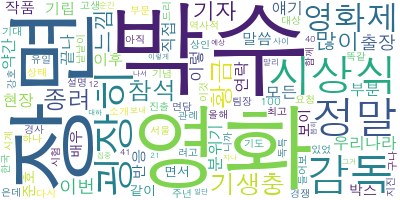

In [87]:
termList = textObj.vocab()

path = "/Libaray/Fonts/AppleGothic.ttf"
wc = WordCloud(font_path=path, max_words=100, background_color="white")
wc.generate_from_frequencies(termList)
wc.to_image()

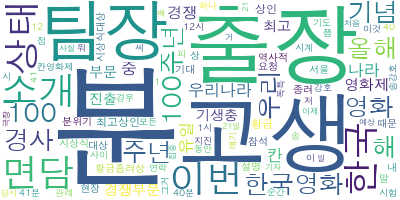

In [90]:
tagged = Kkma().nouns(corpus)
nounList = defaultdict(int)

for _ in tagged:
    nounList[_] += 1

wc.generate_from_frequencies(nounList)
wc.to_image()

### K-Means : Clustering

### LDA : topic modeling

### Sentiment Analysis